In [ ]:
%pip install pandas scikit-learn matplotlib seaborn joblib openpyxl


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib


In [3]:
df = pd.read_excel("Employees.xlsx")
df.head()


,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [4]:
experience_col = "Years"
jobrole_col = "Department"
salary_col = "Annual Salary"

df = df[[experience_col, jobrole_col, salary_col]].dropna()
df.head()


,Years,Department,Annual Salary
0,2,Quality Control,18720
1,0,Quality Control,38964
2,3,Major Mfg Projects,30072
3,2,Manufacturing,21936
4,0,Manufacturing,11640


In [5]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Years          689 non-null    int64 
 1   Department     689 non-null    object
 2   Annual Salary  689 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 16.3+ KB


,Years,Annual Salary
count,689.000000,689.000000
mean,1.476052,24818.420900
std,1.190963,9159.470878
min,0.000000,8436.000000
25%,1.000000,17232.000000
50%,1.000000,24924.000000
75%,2.000000,32184.000000
max,5.000000,41400.000000


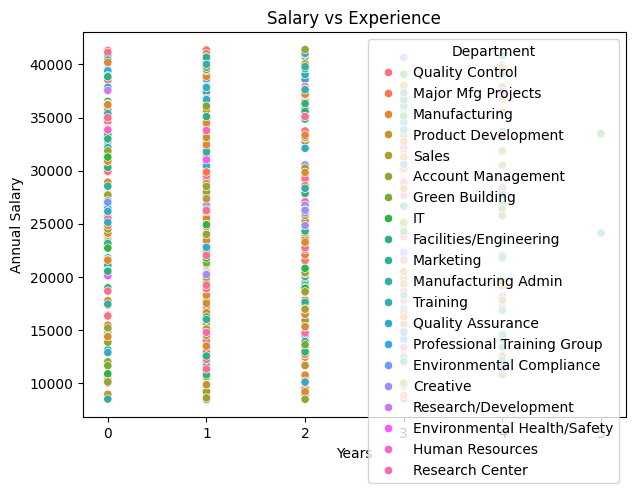

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x=experience_col, y=salary_col, hue=jobrole_col)
plt.title("Salary vs Experience")
plt.show()


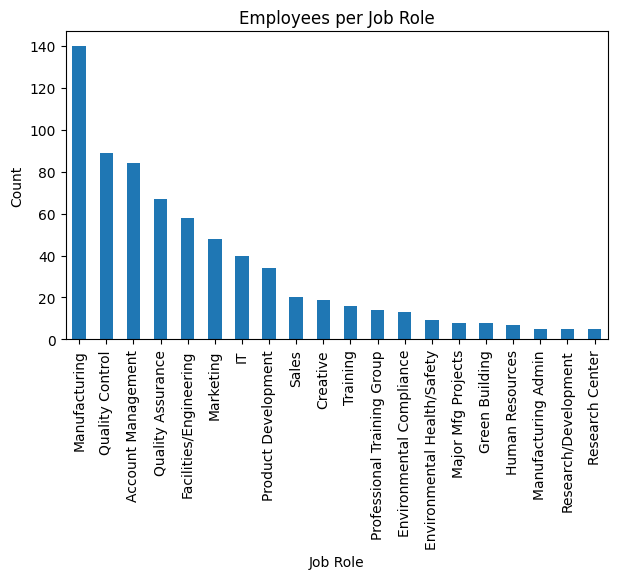

In [7]:
df[jobrole_col].value_counts().plot(kind="bar", figsize=(7,4))
plt.title("Employees per Job Role")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.show()


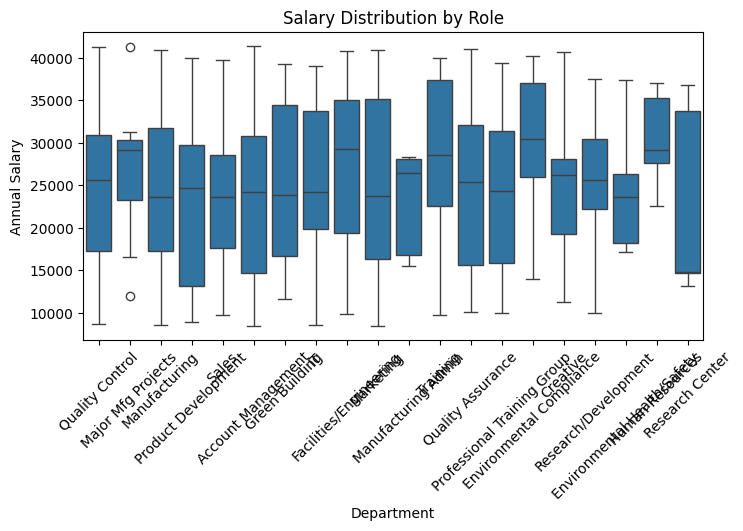

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x=jobrole_col, y=salary_col)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Role")
plt.show()


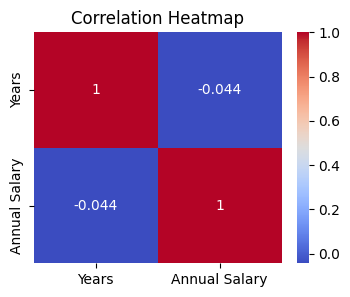

In [9]:
corr = df[[experience_col, salary_col]].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
X = df[[experience_col, jobrole_col]]
y = df[salary_col]

preprocessor = ColumnTransformer([
    ("num", "passthrough", [experience_col]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), [jobrole_col])
])


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
model = RandomForestRegressor(n_estimators=200, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])


In [13]:
pipeline.fit(X_train, Y_train)

preds = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(Y_test, preds))
print("R² Score:", r2_score(Y_test, preds))


MAE: 8714.00540887629
R² Score: -0.19095143685086735


In [14]:
joblib.dump(pipeline, "salary_model.pkl")
"Model saved successfully!"


'Model saved successfully!'

In [15]:
loaded_model = joblib.load("salary_model.pkl")
"Model loaded!"


'Model loaded!'

In [ ]:
# SAFE Experience Input
exp = input("Enter Years of Experience: ").strip()

# Keep asking until the user enters a valid number
while exp == "" or not exp.replace('.', '', 1).isdigit():
    print("❌ Invalid input! Please enter a number (example: 3 or 5.5)")
    exp = input("Enter Years of Experience: ").strip()

exp = float(exp)

# SAFE Job Role Input
role = input("Enter Job Role: ").strip()

while role == "":
    print("❌ Job Role cannot be empty!")
    role = input("Enter Job Role: ").strip()

# Create input dataframe
input_df = pd.DataFrame({
    experience_col: [exp],
    jobrole_col: [role]
})

predicted_salary = loaded_model.predict(input_df)[0]
print(f"\nPredicted Salary: ₹{predicted_salary:,.2f}")
